<a href="https://colab.research.google.com/github/rahul-kulkarni/w207-final-team4-project/blob/master/Home_Price_Prediction_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Price Prediction Project
### Team member: 
Shujing Dong, Hyunchul (Peter) Kim, Rahul Kulkarni, Vidhu Nath


## Baseline Overview
### 1. Introduction and Problem Statement
 
The House Price Prediction Project [project](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) aims to predict home prices of residential homes in Ames, Iowa, using advanced machine learning techniques. The project is based off of a dataset that includes over 80 independent variables, used as features, that capture various aspects of the residential homes. These features will form the basis of our models, specifically a regression model that will help us predict house sales prices. There will be inclusion of other models but we will focus primarily on regression and will gaugue our success by the final score determined by the model. 

Our approach to this problem will be first to explore the data through our EDA and understand what the shapes of the data are, how the variables can affect each other, and what their bottom line impact is on sale price. Through our EDA we will determine which factors are the best to focus on, allowing us to clean up the data set through feature engineering. We will then begin our modeling process and include additional EDA throughout as we gain a better understanding of the data. Following that, we will train our models with the data we select and evaluate the results. Finally, we will re-evaluate our score and update the models and features as needed, until we gain confidence that we achieved the best results we can.


### 2. Initial findings from EDA

From our preliminary analysis of the given dataset, we determined that our target variable will be _'SalePrice'_, and it is supported by 37 numeric features, such as the year the house was built, and 43 categorical features, such as the type of fireplace. The training and test data provided are essentially an even split - 1460 samples for the training and 1459 for the test. 

Below is a summary of our findings, which we go into more detail later on.
 
- **Finding 1:** 
    - The top five features with missing values (>20%) are identical for train and test data, namely 'PoolQC',' MiscFeature', 'Alley', 'Fence', 'FireplaceQu'.  All five features are in the categorical set. 
    - PoolQC has the most missing data,  likely due to the fact that most homes don't have a pool.  While that may not be the actual case, we will have to consider how we deal with non-existent values.
    - Finding 1 lead us to believe that the six features with the most missing data do not provide enough information to the model. Given this finding we will remove them from the training and test data.  


- **Finding 2:** 
    - There are discrete numerical features and continous numerical features. We intend to normalize the discrete numerical features and explore various techniqes for normalization.  
    - For  example, features  that exhibit extreme skeweness, we will apply log transformation for normalization.


- **Finding 3:** 
    - Log transformation performs well in normalizing sale price. 


- **Finding 4:** 
    - Top 10 features that are highly correlated with _'SalePrice'_ are: 'OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', and 'YearRemodAdd'. 
    - Out of the top ten features, 'GarageCars' and 'GarageArea', 'GrLivArea' and 'TotRmsAbvGrd', 'TotalBsmtSF' and '1stFlrSF' are highly correlated, which introduces multicollinearity. 
    - Given this finding we would transform or select features to avoid multicollinearity.
    
    
- **Finding 5:** 
    - Top 5 features that are positively correlated with _'SalePrice'_ are: 'OverallQual', 'YearBuilt', 'GrLivArea', 'GarageCars', 'GarageArea'.   
    - Top 5 features that are negatively correlated with _'SalePrice'_ are: 'ExterQual', 'BstmQual', 'KitchenQual', 'GarageType', 'Garage Finish'.

 
 
### 3. Assumptions: 
Since we are mostly focusing on feature engineering and utilizing regression, the assumptions we make about the sample data are that the samples are normally distributed and that there is no multicollinearity between features. We will touch on this more with our approach.


    
### 4. Approaches: 
The set of approaches we intend to undertake are listed below; based on the outcome of our analysis we may decide to pick the one(s) which are most optimal for our solution.

  1. Models (detailed explanation see Modeling section below): 
    - Linear Regression 
    - Lasso Regressor
    - Ridge Regressor
    - Gradientboosting Regressor
    - XGBoosting Regressor
    - Random Forest Regressor
 
      
  2. Feature engineering: 
    - Feature selection: most influential features, features with multicolinearity, least infuential features
    - Missing data processing: fill the missing value with 0, mean, median, categorial with 'None'
    - Normalization Transformation: log operator
    - Categorical feature transformation: encoding/ One hot encoding
    - PCA to reduce the dimension of features
    
    
 3. **Metric - Root-Mean-Squared Error:**
     - Root Mean Square Error (RMSE) is adopted as the metric to measure how well models perform, as RMSE is the standard deviation of the residuals. 
     - RMSE measures how spread out th residuals are around the line of best fit.
     - Kaggle competition used RMSE as the determinant for scoring, so we focused on it as part of our approach.
 
 
### 5. Issues we encounter in the process:
Based on our initial analysis, we fully anticapte that some of the challenges we will encounter will be around feature selection and feature engineering; as we try to normalize the selection and determine the most impactful features, there will be issues with picking features, applying transformations to avoid multicollinearity, encoding categorical features, and regularization to penalize overfitting. Cross-validations and ensemble model testing will pose problems as well, especially as we try out different models. Correct parameterization of models will crucial, and so there will be challenges posed by figuring out the best set of parameters for our models before they are even trained on our features.

## Data overview 


In [1]:
##We use colab to run this notebook
##It assumes the input files are available in the following dirs under My Drive in gdrive
##Directory structure: Colab Notebooks/w207_final_project/house-prices-advanced-regression-techniques
##It also needs access to gdrive 
import pandas as pd
import numpy as np
import scipy.stats as stat
import time
from collections import defaultdict

from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV

import matplotlib as mp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Remove or add based on platform.
from google.colab import drive 
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# Reference: https://towardsdatascience.com/deep-neural-networks-for-regression-problems-81321897ca33
# Get data from the train and test files saved off.
def get_data():
    # Get train data.
    train_data_path ='gdrive/My Drive/Colab Notebooks/train.csv'
    train = pd.read_csv(train_data_path)
    
    # Get test data.
    test_data_path ='gdrive/My Drive/Colab Notebooks/test.csv'
    test = pd.read_csv(test_data_path)
    return train , test

# Combine the data into one large data set.
# Make sure to separate out the target variable SalePrice
def get_combined_data():
    # Collect the train and test data.
    train , test = get_data()

    # Set our target.
    target = train.SalePrice
    train.drop(['SalePrice'],axis = 1 , inplace = True)
    
    # Combine the two data sets.
    combined = train.append(test)
    
    # Remove the inital columns and return.
    combined.reset_index(inplace=True)  
    combined.drop(['index', 'Id'], inplace=True, axis=1)
    return combined, target

# Load train and test data into pandas DataFrames.
train_data, test_data = get_data()

# Combine train and test data to process them together.
combined, target = get_combined_data()
  
# re-load train and test data into pandas DataFrames as backup.
train, test = get_data()

# original data frame backup for reference
train_orig = train.copy()
test_orig = test.copy()

In [3]:
# Quick look at the train data set.
combined.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [4]:
# Describe the data
combined.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [5]:
# Describe the target variable
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## Feature overview

In [6]:
# Check how many numeric and categorical features exist.
# SalePrice (Output) included.

# Separate out the numeric and categorical columns based on the value type.
numeric_columns = [f for f in train.columns if train.dtypes[f] != 'object']
category_columns = [f for f in train.columns if train.dtypes[f] == 'object']

print('Numeric features: {}'.format(len(numeric_columns)))
print('Categorical features: {}'.format(len(category_columns)))
print("Train and Test dataset shapes:")
print(train.shape, test.shape)

Numeric features: 38
Categorical features: 43
Train and Test dataset shapes:
(1460, 81) (1459, 80)


In [7]:
# Print out the column names for each type.
print('Numeric feature names : {}'.format(numeric_columns))
print('Numerical feature shape : {}'.format(np.shape(numeric_columns)))
print('Categorical feature names : {}'.format(category_columns))
print('Categorical feature shape : {}'.format(np.shape(category_columns)))

Numeric feature names : ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
Numerical feature shape : (38,)
Categorical feature names : ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electric

Total of 2919 data sets: 1460 Train +  1459 Test set

## Exploratory Data Analysis

### Missing data

One of the biggest concerns with predictive modeling is using features with a lot of missing data. Features that have a lot of missing data are effectively a crutch for our prediction models since the data skews the accumulation of probabilities used during trainings, as well as skewing the means, variances, and correlations of our data.

It is crucial for us to understand the amount of missing variables in our features, and removing them from our data. Keeping too many features with large amounts of missing data is going to negatively affect our data.

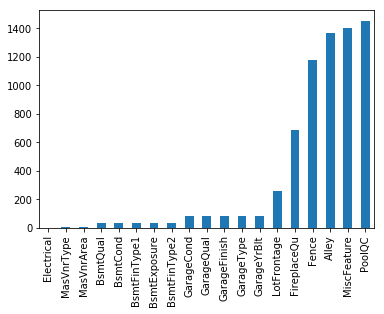

In [8]:
# We will go about finding the missing data by seeing which columns have at least one missing value.
missing_train = train.isnull().sum()
missing_test = test.isnull().sum()

# Reconvert missing lists to have all features with missing data.
missing_train = missing_train[missing_train > 0]
missing_test = missing_test[missing_test > 0]

# Sort from least to greatest.
missing_train.sort_values(inplace=True)
missing_test.sort_values(inplace=True)


# Plot to see features with the most missing values in train data.
missing_train.plot.bar()


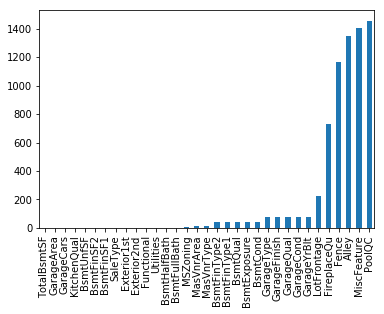

In [9]:
# Plot to see features with the most missing values in test data.
missing_test.plot.bar()

In [10]:
# Create a method to determine the amount of missing values per feature.
# This will help us see which features are the least impactful due to the amount of missing values.
def percent_missing(data):
    # Find the total NA-valued data and sort by descending order.
    total = data.isnull().sum()
    total_sorted = total.sort_values(ascending=False)
    
    # Calculate the percent of missing data.
    percent = (data.isnull().sum() / data.isnull().count())
    percent_sorted = percent.sort_values(ascending=False)
    
    # find features with most missing values.
    missing_data = pd.concat([total_sorted, percent_sorted], axis=1, keys=['Total Missing', 'Percent of Missing values'])
    print(missing_data.head(10))  
    
# Print out the missing data percentages for train and test data.
print('Features with most missing values in TRAIN data:')
percent_missing(train_data)
print()
print('Features with most missing values in TEST data:')
percent_missing(test_data)

Features with most missing values in TRAIN data:
              Total Missing  Percent of Missing values
PoolQC                 1453                   0.995205
MiscFeature            1406                   0.963014
Alley                  1369                   0.937671
Fence                  1179                   0.807534
FireplaceQu             690                   0.472603
LotFrontage             259                   0.177397
GarageCond               81                   0.055479
GarageType               81                   0.055479
GarageYrBlt              81                   0.055479
GarageFinish             81                   0.055479

Features with most missing values in TEST data:
              Total Missing  Percent of Missing values
PoolQC                 1456                   0.997944
MiscFeature            1408                   0.965045
Alley                  1352                   0.926662
Fence                  1169                   0.801234
FireplaceQu           

### **Finding 1:** 
The top 6 features with most missing values (>20% missing from total) are identical for train and test data, namely 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', all of which are categorical data. 'PoolQC' has the most missing data - most likely due to the fact that most homes don't have a pool in Iowa, but may be due to cost, space available, or a number of other factors. Note that at at 'FireplaceQu', the amount of missing data increases dramatically over the other features. As such, we can determine that these 6 features don't provide enough information to the prediction, and thus can be removed from the training and test data.

In [11]:
# Remove features that have more than 20% of missing values in train and test.
train_new= train_data.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'] ,axis=1)
test_new= test_data.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'] ,axis=1)

# In order to ensure that our models are not biased towards any value, we will fill in the data
# with 0s in the rest of our features in the test and training data.
category_columns_new = [f for f in train_new.columns if train_new.dtypes[f] == 'object']

# Add in the filler values and combine the dataframes.
train_numeric = train_new[numeric_columns].fillna(0)
train_category = train_new[category_columns_new].fillna('None')
train_new = pd.concat([train_category,train_numeric], axis=1, sort=False)

# Verify that no more null  values exist in our data.
print(train_new.isnull().sum())

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
                ..
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF 

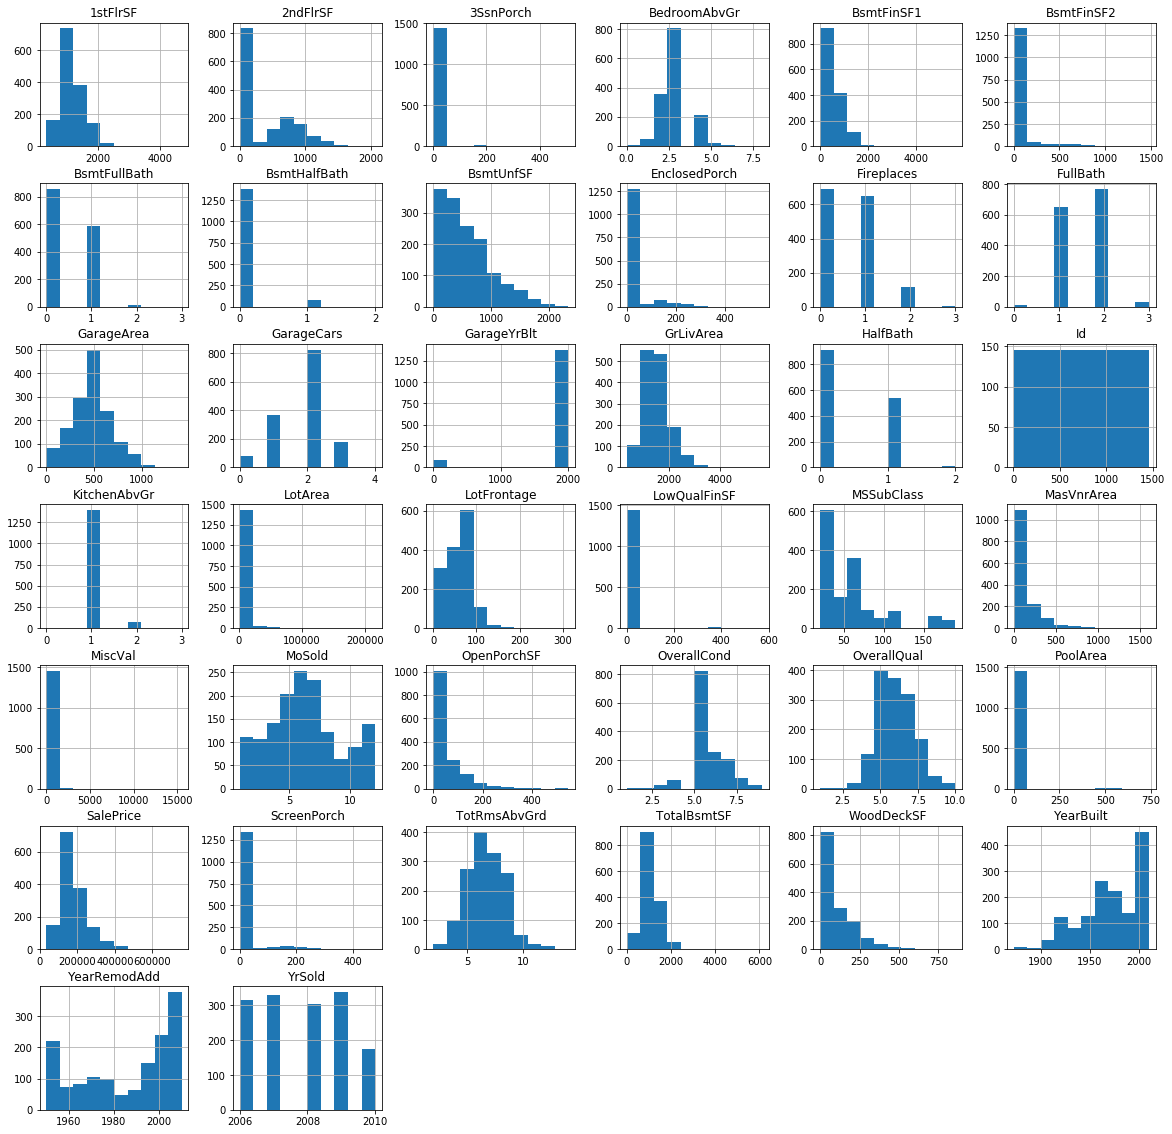

In [12]:
# Show the histgrams of numerical features.
train_new.hist(figsize=(20,20))
plt.show()

### **Finding 2:**  
Looking into the shape and distribution of the features, we find that many are discrete while others are continuous; many have normal-like distributions and other are exceptionally skewed. With these data, we need to determine our method of normalization and figure out which features need to be transformed. 


Numerical features can be transformed via mathematical functions, such as log, power, and linear transforms. We will explore those transformations for our numerical data. For our categorical features, we have binarized them via a one-hot encoding function.

Skewness before log transformation:  1.88
Kurtosis before log transformation:  6.54


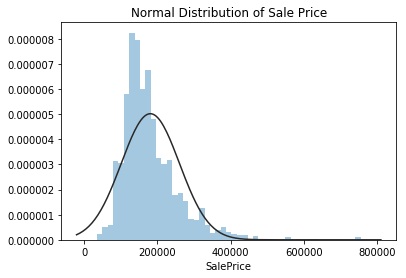

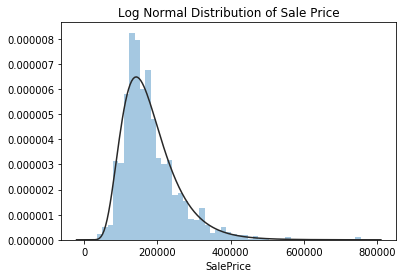

In [13]:
# Grab our target variable - house sale price.
sale_price = train_new['SalePrice']

# Analyze the skewness and kurtosis before normalizing the data.
print("Skewness before log transformation: ", round(train_new['SalePrice'].skew(), 2))
print("Kurtosis before log transformation: ", round(train_new['SalePrice'].kurt(), 2))

# Plot the normal fit for our data.
plt.figure(1); plt.title('Normal Distribution of Sale Price')
sns.distplot(sale_price, kde=False, fit=stat.norm)

# Plot the log-norm fit for our data.
plt.figure(2); plt.title('Log Normal Distribution of Sale Price')
sns.distplot(sale_price, kde=False, fit=stat.lognorm)



# Looks Like log of the nomral would be the best distribution to test with

### Finding 3: 

We can see through our plots that the log-norm transformation will be the best for our data. The curve of the log-norm graph aligns exceptionally closly with our data, giving us confidence that the transformation is appropriate for our results. Normalizing our target variable means that the final interpretation will be different than just a direct prediction; rather, it will require applying the inverse operation to get a direction prediction of sales price for a given set of inputs. However, accounting for that transformation will be simple enough without models.

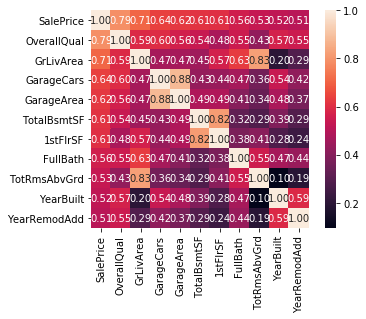

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64 

----------------------
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [14]:
# Use a heat map to demonstrate the correlation changes.
columns = train_new.corr().nlargest(11,'SalePrice')['SalePrice'].index
sns.heatmap(np.corrcoef(train_new[columns].values.T), cbar=True, annot=True, square=True, 
            fmt='.2f', annot_kws={'size': 10}, yticklabels=columns.values, xticklabels=columns.values)
plt.show()

# Plot the top correlated features (both positively and negatively) with sale price.
corr_matrix = train_new.corr()
print (corr_matrix['SalePrice'].sort_values(ascending=False)[:11], '\n') # top 10 values
print ('----------------------')
print (corr_matrix['SalePrice'].sort_values(ascending=False)[-10:]) # bottom 10 values

### Finding 4: 
Correlation, both positive and negative, is important to selecting features which have an impact on SalePrice. The higher the correlation, the greater the chance that a feature will affect the value of SalePrice, so it important for us to look at the values with the highest magnitude of correlation in our feature engineering. We will have to be careful that we're avoiding multicollinearity with our features, as that could skew the results of our models.

We can see from the plot above that the top 10 features that are highly correlated with SalePrice  are: 'OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', and 'YearRemodAdd'. Out of these features, 'GarageCars' and GarageArea', 'GrLivArea and 'TotRmsAbvGrd', 'TotalBsmtSF', and '1stFlrSF' are highly correlated, which shows multicollinearity. We need to transform thes features to avoid multicollinearity.  

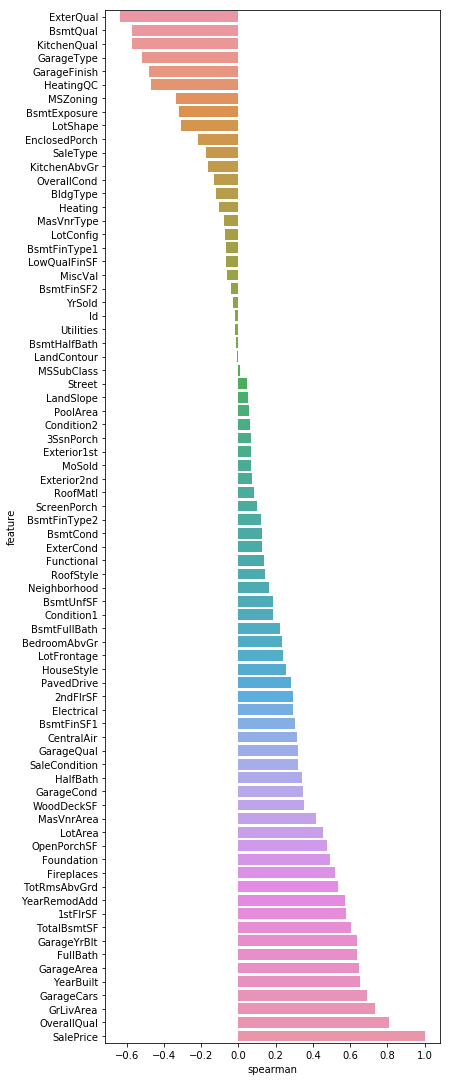

In [15]:
# Plot the correlations again in a different representation.
def corr_diagrams(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    
    # Arrange the features of the dataset using Spearmen's rank correlation method.
    spr['spearman'] = [frame[f].corr(frame['SalePrice'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    
    # Plot the results of the correlation ranking.
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')
    
# Collect the features.
features = train_new.columns
corr_diagrams(train_new, features)

### Finding 5: 
Top 5 features that are positively correlated with SalePrice  are: OverallQual','YearBuilt,GrLivArea,GarageCars,GarageArea. Top 5 features that are negatively correlated with SalePrice  are: ExterQual, BstmQual,KitchenQual, GarageType, Garage Finish.

The top positively correlated features have a stronger impact on the target variable 'SalePrice' than the negatively impacted correlated features, as can be seen on the Spearmen plot. This means that our models will have stronger prediction power utilizing these positively correlated features.

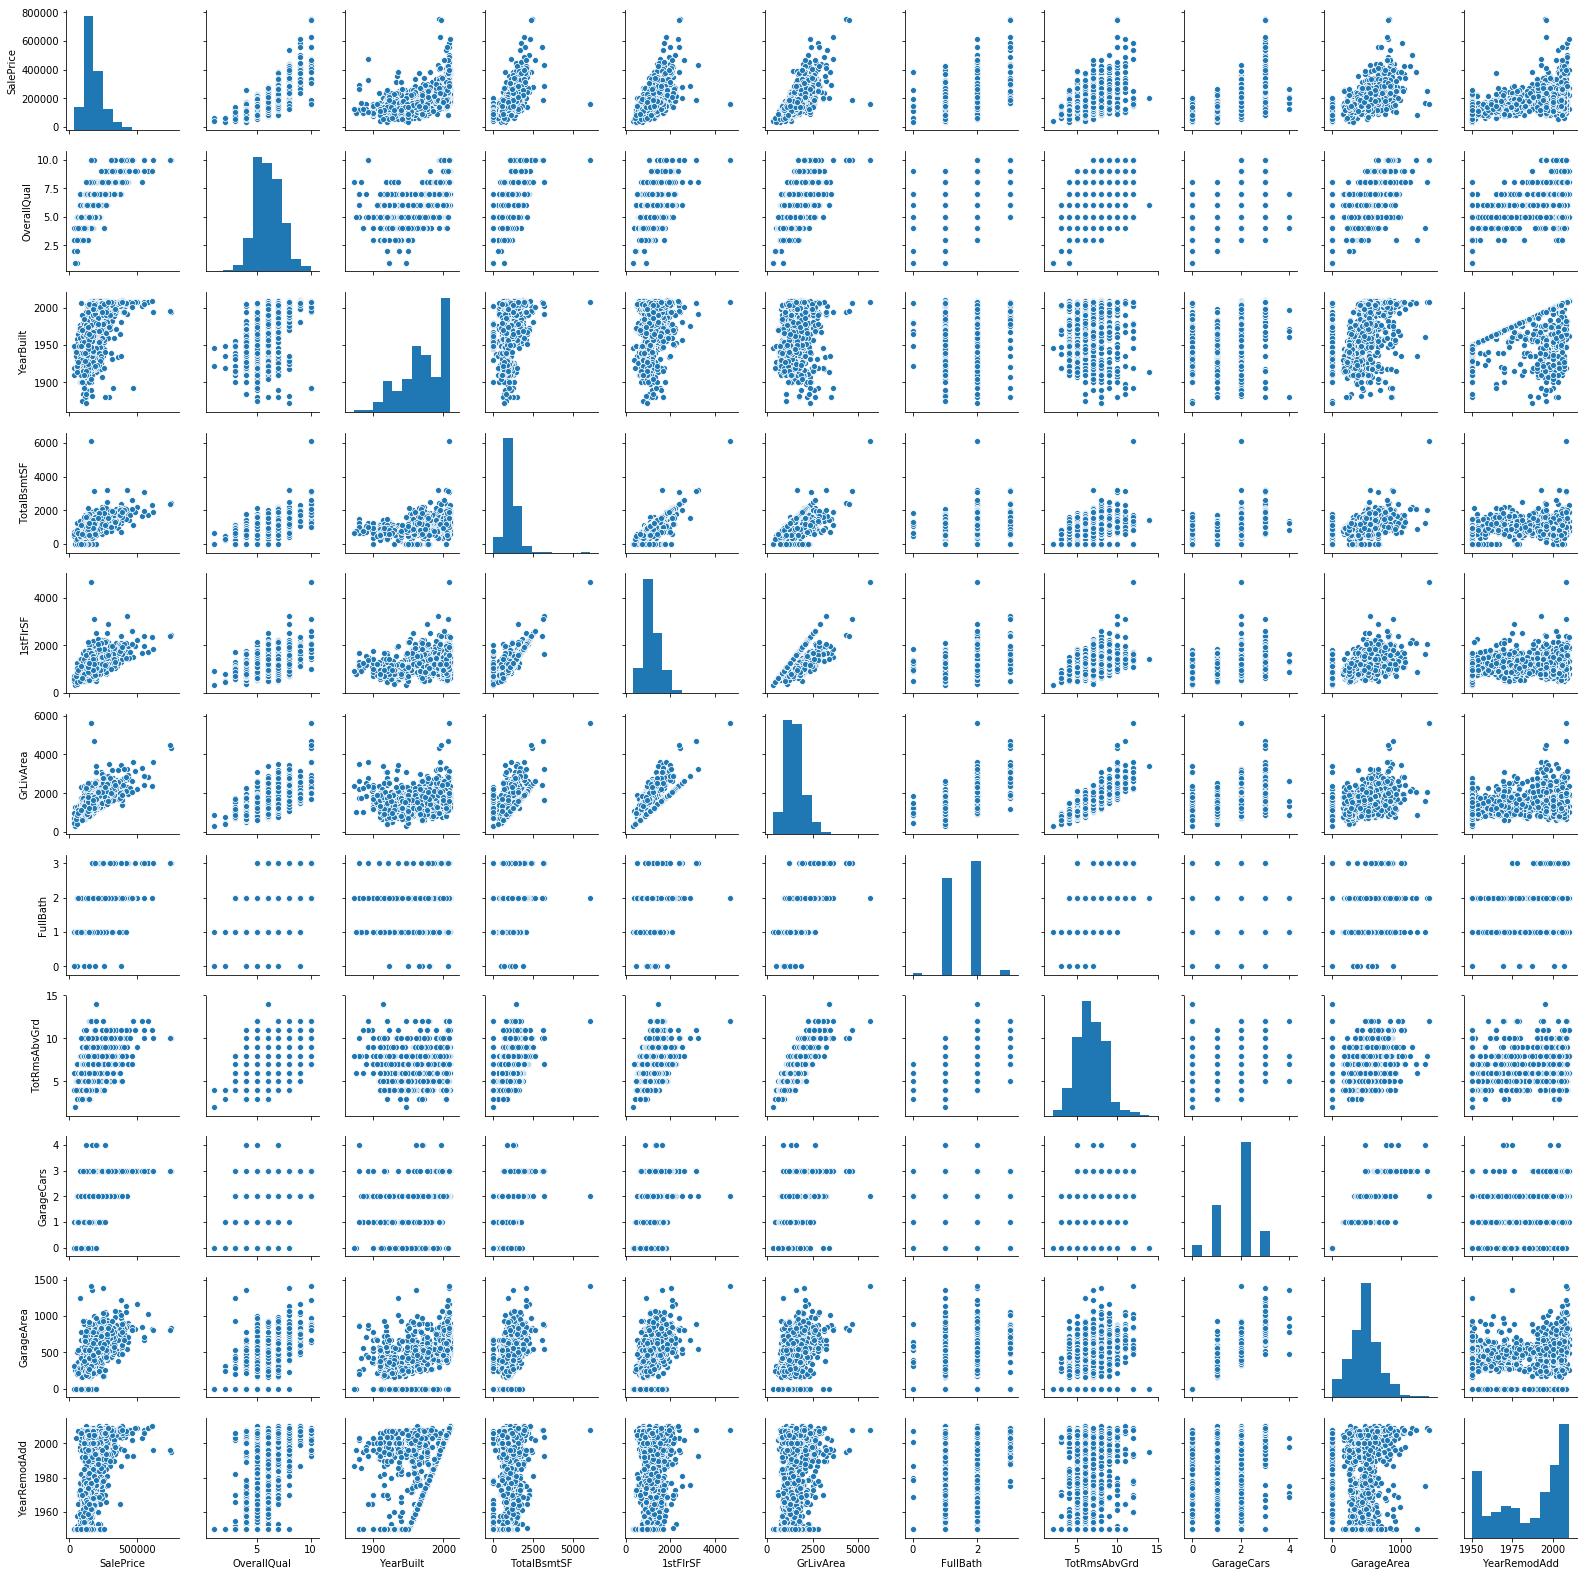

In [16]:
# Display a pair-wise scatterplot of all of the features we have seen as the highest correlation with SalePrice.
cols = ['SalePrice','OverallQual','YearBuilt','TotalBsmtSF','1stFlrSF',
        'GrLivArea','FullBath', 'TotRmsAbvGrd', 'GarageCars','GarageArea','YearRemodAdd']
sns.pairplot(train_new[cols], height=2)
plt.show()

## Visualization of top features
We want to see how the features we have remaining after our initial EDA are distributed, and how the top features are shaped.

(-0.5, 3.5, 0, 800000)

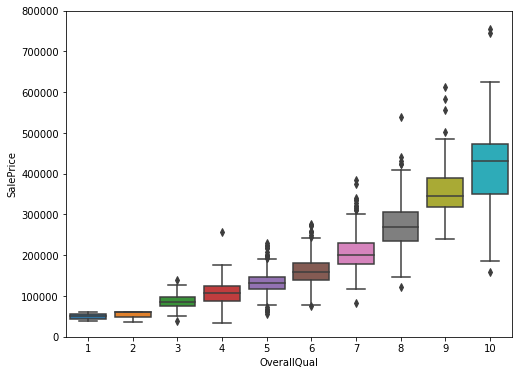

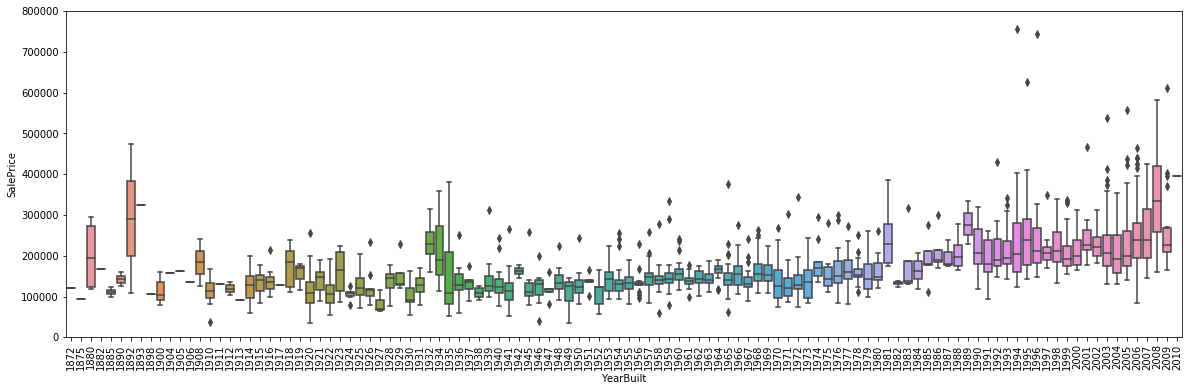

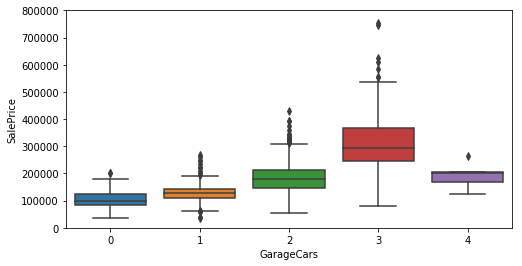

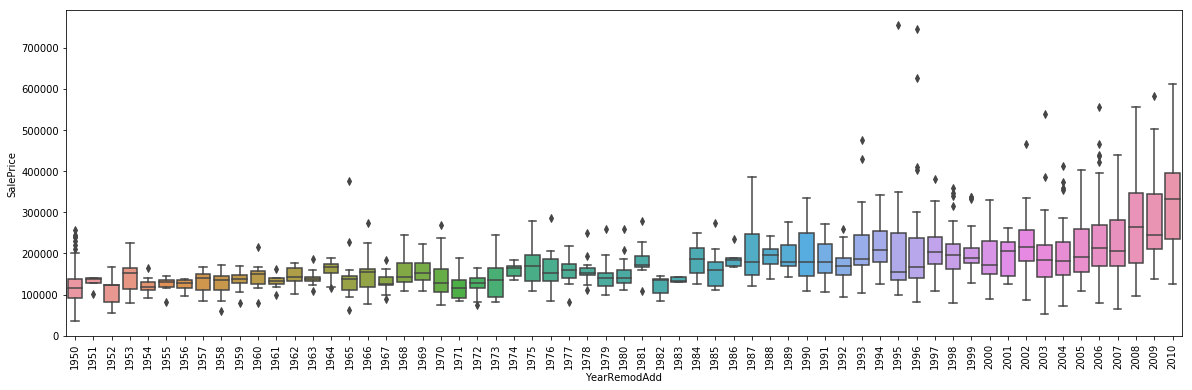

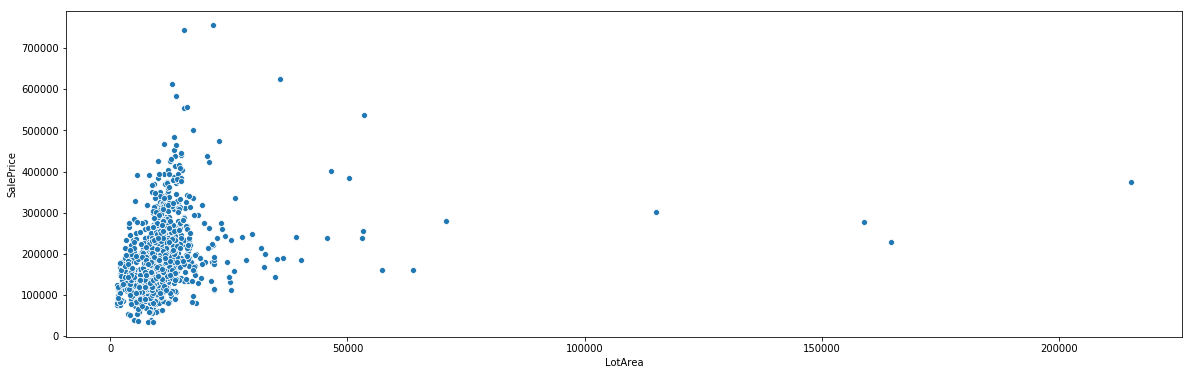

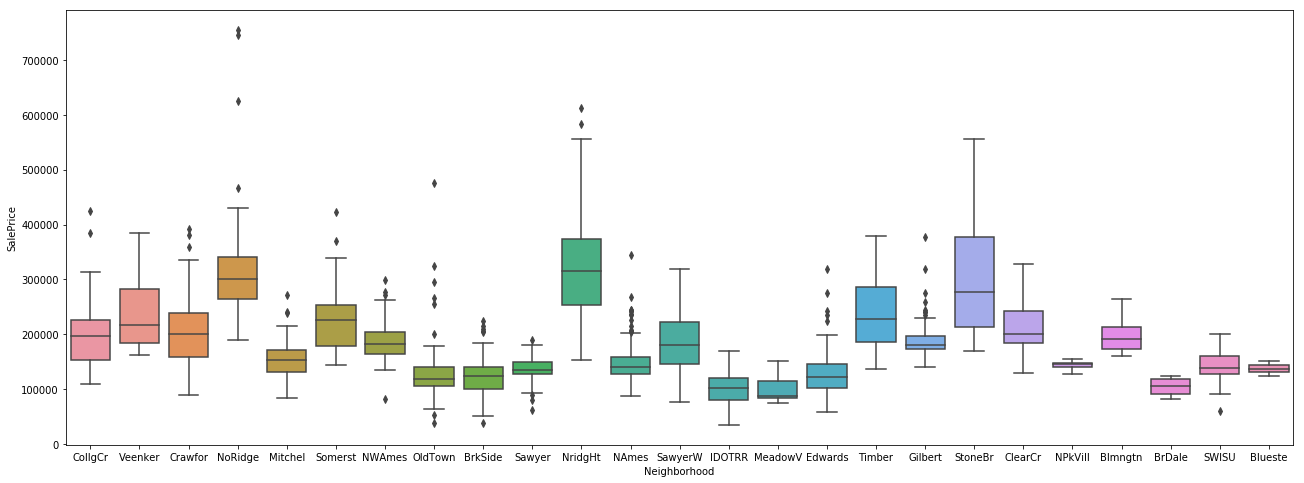

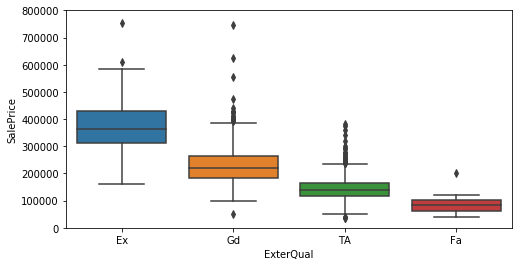

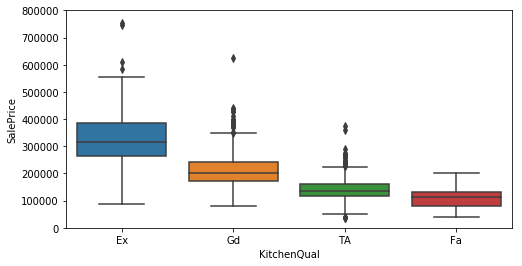

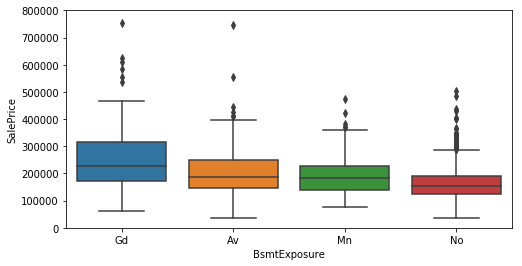

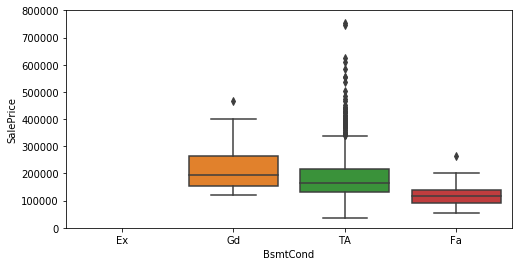

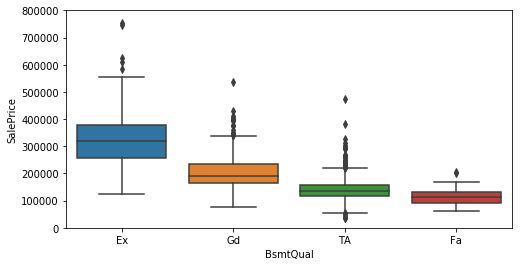

In [17]:
# Boxplot of OverallQual/SalePrice.
var = 'OverallQual'
data = pd.concat([train_new['SalePrice'], train_new[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

# Boxplot of YearBuilt/SalePrice.
var = 'YearBuilt'
data = pd.concat([train_new['SalePrice'], train_new[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90);

# Boxplot of GarageCars/SalePrice.
data = pd.concat([train_new['SalePrice'], train_new['GarageCars']], axis=1)
f, ax = plt.subplots(figsize=(8, 4))
fig = sns.boxplot(x='GarageCars', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);


# Year Remod vs Saleprice.
plt.subplots(figsize=(20, 6))
D = pd.concat([train_new['SalePrice'], train_new['YearRemodAdd']], axis=1)
BP = sns.boxplot(x='YearRemodAdd', y="SalePrice", data=D)
plt.xticks(rotation=90)

# Lot Area vs Saleprice.
plt.subplots(figsize=(20, 6))
D = pd.concat([train_new['SalePrice'], train_new['LotArea']], axis=1)
BP = sns.scatterplot(x='LotArea', y="SalePrice", data=D)

# Neighborhood vs SalePrice.
plt.subplots(figsize=(22, 8))
D = pd.concat([train_new['SalePrice'], train_new['Neighborhood']], axis=1)
BP = sns.boxplot(x='Neighborhood', y="SalePrice", data=D)


# Boxplot of ExterQual/SalePrice.
data = pd.concat([train_new['SalePrice'], train_new['ExterQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 4))
fig = sns.boxplot(x='ExterQual', y="SalePrice", data=data,
                  order=["Ex", "Gd", "TA", "Fa"])
fig.axis(ymin=0, ymax=800000)


# Boxplot of KitchenQual/SalePrice.
data = pd.concat([train_new['SalePrice'], train_new['KitchenQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 4))
fig = sns.boxplot(x='KitchenQual', y="SalePrice", data=data,
                  order=["Ex", "Gd", "TA", "Fa"])
fig.axis(ymin=0, ymax=800000)

# Boxplot of BsmtExposure/SalePrice.
data = pd.concat([train_new['SalePrice'], train_new['BsmtExposure']], axis=1)
f, ax = plt.subplots(figsize=(8, 4))
fig = sns.boxplot(x='BsmtExposure', y="SalePrice", data=data,
                  order=["Gd", "Av", "Mn", "No"])
fig.axis(ymin=0, ymax=800000)

# Boxplot of BsmtCond/SalePrice.
data = pd.concat([train_new['SalePrice'], train_new['BsmtCond']], axis=1)
f, ax = plt.subplots(figsize=(8, 4))
fig = sns.boxplot(x='BsmtCond', y="SalePrice", data=data,
                  order=["Ex", "Gd", "TA", "Fa"])
fig.axis(ymin=0, ymax=800000)

# Boxplot of BsmtQual/SalePrice.
data = pd.concat([train_new['SalePrice'], train_new['BsmtQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 4))
fig = sns.boxplot(x='BsmtQual', y="SalePrice", data=data, order=["Ex", "Gd", "TA", "Fa"])
fig.axis(ymin=0, ymax=800000)


## Feature Engineering

The EDA showed the distributions and shape of the data, giving us an idea as to how we will manage them. Now we will begin with feature engineering, through which we will apply transforms to our features to extract more meaningful data and value from them.

Within this section we will cover:
  - Missing data processing
  - Normalization Transformation: applying log transformation, operations, and more
  - Feature selection and determination
  - One hot encoding for categorical features

### One hot encoding for categorical features

In [18]:
## This converts categorical feature to one-hot-encoded feature. 
def one_hot_encode(df, colNames):
    for col in colNames:
        
        # Check if the feature is categorical and create dummy data.
        if( df[col].dtype == np.dtype('object')):
            dummies = pd.get_dummies(df[col],prefix=col)            
            df = pd.concat([df,dummies], axis=1)

            # Remove the encoded column.
            df.drop([col],axis = 1 , inplace=True)
            
    return df

# Print out comparisons of data after encoding.
print('There were {} columns before encoding categorical features for training data'.format(train_new.shape[1]))
train_encoded = one_hot_encode(train_new, category_columns_new)
print('There are {} columns after encoding categorical features for training data'.format(train_encoded.shape[1]))


print('There were {} columns before encoding categorical features for test data'.format(test_new.shape[1]))
test_encoded = one_hot_encode(test_new, category_columns_new)
print('There are {} columns after encoding categorical features for test data'.format(test_encoded.shape[1]))


There were 76 columns before encoding categorical features for training data
There are 282 columns after encoding categorical features for training data
There were 75 columns before encoding categorical features for test data
There are 255 columns after encoding categorical features for test data


## Modeling
The basis for the Kaggle project is developing a predictor for house prices. As such, our model selection should be able to handle the variety of the data as well as the nature of the data we are working with. Some models are okay with many paramenters, while others handle sparse data sets more effectively. For our needs, we need to understand what the strengths of each model is, while understanding the limitations of each. Below, we can look at each model and try to figure out what importance they will be able to give us regarding the relationship between the features we've engineered and the target variable.



1. **Linear Regression (LR)**
    - LR is great for modeling features when there are distinct linear relationships with the target variable, and more so when Gradient Ascent is applied along with regualarization to avoid overfitting and getting more accurate results.
    - There is a drawback when interacting with variables that are not founded in linear relationships. Fortunately that hasn't been obvious through our EDA, so LinearRgression should be an effective algorithm.
    - Additionally, we should be careful of outliers since they can have significant impact on the regression coefficients.


2. **Least Absolute Shrinkage and Selection Operator (LASSO)**
    - LASSO is a type of linear regression which works well with spare data, which we don't have; but importantly for us, it is effective at handling data with high multicollinearity.
    - LASSO works by "shrinking" data close to a central value or feature.
    - Some of our data which have non-trivial correlation with 'SalePrice' (corr > 0.5) are highly correlated with other features. We want to reduce the impact of that multicollinearity as much as possible and LASSO will help with that.
    - LASSO utilizes _L1 Regularization_ which modifies the coefficients via the aboslute value.


3. **Ridge Regression (RR)**
    - In a similar note to LASSO, RR is great for dealing with features having high multicollinearity
    - It utilizes a shrinking factor similar to LASSO
    - However, biggest difference is that Ridge uses _L2 Regularization_ which applies an L2 factor based on the square magnitude of the coefficients.


4. **Principal Component Analysis (PCA)**
    - PCA is a tool that is strong at reducing dimensions of the feature space, which will be crucial to our modeling since we have many features being used to predict our target variable.
    - There is a lot redundancy in our data since we have features which have been encoded, so reducing that redundancy through PCA improves the quality of our data.
    - PCA is also good at finding the variability within the data, which will help the models calculate more accurate predictions once PCA has been applied on our data.


5. **Gradient Boosting Regressor (GBR)**
    - Similar to how AdaBoost works.
    - GBR builds an additive model by taking hyperparameters and optimizing based off of loss functions, here for regression is the squared error.
    - Creates trees whose nodes are checked against the negative gradient to determine which gradient value is optimal going forward.
    - Optimizing the loss function through GBR allows us to further refine our estimates as we include multiple features into our model.
    
6. **Random Forest Regressor (RFR)**
    - RFR can make a collection of trees which allow for high-variance data to be processed as low variance, improving the accuracy of the predictions.
    - The benefit of RFR is that it can be used for a lot of our features which can have high variance due to the type of data the feature is defined by.
    - Creating many trees before processing can reduce the amount of overall variance in our model.
    
7. **Extreme Gradient Boosting Regressor (XGBR)**
    - XGBR is a faster version of GBR can be useful in not just improving weak learning algorithms but in also improving the efficiency with which the fitted is executed. 
    -  Mechanically faster implementation of the GBR with potentially higher scores and processing for the amount of features that we have, especially after they have been transformed.


Note that while the algorithms themselves are effective at determining and predicting relationships, the most important factor in getting accurate results is the data preparation, cleaning, exploration, and engineering. Our models and algorithms are only as effective as the data provided, so effectively the tests of the models are as much a reflection on the model itself as it on the data engineering that we did prior.


### Scaling Features

For our features, we want to include feature scaling as a way of normalizing the data. Principal Component Analysis, as an example, is sensitive to the variance of the data, and requires features to be scaled appropriately before being utilized. Additionally, the variety of features means that a direct comparison of them is impractical. For instance, the year built would be a poor feature to compare on the same scale as number of garage doors. As such, scaling neds to be appled to the features to prevent the learning algorithm from 'misinterpreting' the scale of the features and incorrectly comparing them.

In [19]:
# Extract all the other features but keep the SalePrice (target) column.
Y_train_all = train['SalePrice']

# Drop SalePrice: Train and Test have same dimension.
train_new.drop('SalePrice', axis=1, inplace=True)

# Preseve test dataset IDs which will be needed for the final prediction/submission.
test_id = test.iloc[:,0]

# Combine test and train datasets.
combined_df = pd.concat([train_new, test_new]).reset_index()
combined_df.shape

print(combined_df.head())

   index  1stFlrSF  2ndFlrSF  ...  YearBuilt  YearRemodAdd YrSold
0      0       856       854  ...       2003          2003   2008
1      1      1262         0  ...       1976          1976   2007
2      2       920       866  ...       2001          2002   2008
3      3       961       756  ...       1915          1970   2006
4      4      1145      1053  ...       2000          2000   2008

[5 rows x 76 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


### Remove Correlated Features

We want to make sure that we remove highly correlated features so that the assumption of no muticollinearity holds. Note that this does not invalidate the models which function well with feature having high multicollinearity, like Lasso for instance. Due to the nature of the features, in that how the properties of the house being described tend to be dependent on other features (e.g. number of sinks would be dependent on number of bathrooms), there will still be multicollinearity in our data that the models will take care of in their processing.

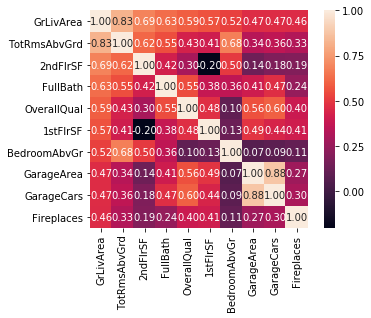

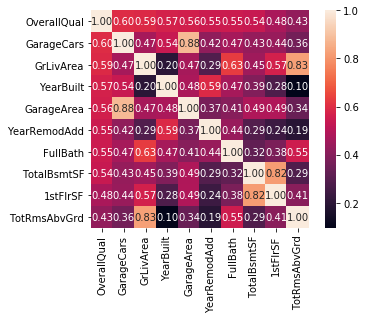

In [20]:
#columns = train_new.corr().nlargest(20,'SalePrice')['SalePrice'].index
#sns.heatmap(np.corrcoef(train_new[columns].values.T), cbar=True, annot=True, 
#            square=True, fmt='.2f', annot_kws={'size': 10}, 
#            yticklabels=columns.values, xticklabels=columns.values)
#plt.show()

# 
columns = train_new.corr().nlargest(10,'GrLivArea')['GrLivArea'].index
sns.heatmap(np.corrcoef(train_new[columns].values.T), cbar=True, annot=True, 
            square=True, fmt='.2f', annot_kws={'size': 10}, 
            yticklabels=columns.values, xticklabels=columns.values)
plt.show()


columns = train_new.corr().nlargest(10,'OverallQual')['OverallQual'].index
sns.heatmap(np.corrcoef(train_new[columns].values.T), cbar=True, annot=True, 
            square=True, fmt='.2f', annot_kws={'size': 10}, 
            yticklabels=columns.values, xticklabels=columns.values)
plt.show()

#remove TotRmsAbvGrd, 2ndFlrSF, FullBath，GarageArea, GarageYrBlt, 1stFlrSF
#train_new =train_new.drop(['TotRmsAbvGrd', '2ndFlrSF', 'FullBath', 'GarageArea','GarageYrBlt', '1stFlrSF'], axis =1)

#remove "Id"
#train_new =train_new.drop(['Id'], axis=1)

### Remove Non-Significant Columns

We want to remove data columns which have the same value. These columns do not affect the prediction and are unnecessary for our modeling. Data that is insignificant provides not benefit nor loss when included in modeling. Entropy is highest when the distribution is uniform or the values identical, so here we are losing some accuracy in having more deterministic data points.

In [0]:
# ID is not useful

# Almost all rows have same value for Utilities, making this variable not useful.
combined_df.drop('Utilities', axis=1, inplace=True)
combined_df.drop('Street', axis=1, inplace=True)
combined_df.drop('MiscVal', axis=1, inplace=True)
combined_df.drop('GarageCars', axis=1, inplace=True)
combined_df.drop('TotRmsAbvGrd', axis=1, inplace=True)
combined_df.drop('TotalBsmtSF', axis=1, inplace=True)
combined_df.drop('2ndFlrSF', axis=1, inplace=True)
combined_df.drop('GarageArea', axis=1, inplace=True)
combined_df.drop('GarageYrBlt', axis=1, inplace=True)
combined_df.drop('1stFlrSF', axis=1, inplace=True)
combined_df.drop('FullBath', axis=1, inplace=True)
combined_df.drop('Id', axis=1, inplace=True)
combined_df.drop('BsmtFinSF2', axis=1, inplace=True)
combined_df.drop('BsmtHalfBath', axis=1, inplace=True)
combined_df.drop('LowQualFinSF', axis=1, inplace=True)
combined_df.drop('YrSold', axis=1, inplace=True)

### Transform Highly Skewed Features

As described in the beginning, features which are highly skewed present problems for our predictive models. These features affect the value in one direction, but do not provide representative impact to the target variable. As such, we will iterate over the features and apply a transformation via `LabelEncoder`.

In [0]:
# Import the label encoder processor.
from sklearn.preprocessing import LabelEncoder

# Iterate over the features and apply a transformation.
for column in train_new.columns:
    if train_new[column].dtype == type(object):
        le = LabelEncoder()
        train_new[column] = le.fit_transform(train_new[column])
        
# Apply a normalization factor via the StandardScaler.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_new)
train_new = scaler.transform(train_new)

### Replace missing values or NaN with 0 or None

Missing values affect our final predictions by not incorporating valid data points. As such we will remove them and replace them with 0. This is in line with what was mentioned before, on how identical values will not impact our predictions.

In [0]:
# A drop was already applied earlier during our EDA, here an additional feature drop will be
# applied to further refine our dataset.
combined_df['MSZoning'].fillna(combined_df['MSZoning'].mode()[0], inplace=True)
combined_df['Functional'].fillna(combined_df['Functional'].mode()[0], inplace=True)
combined_df['SaleType'].fillna(combined_df['SaleType'].mode()[0], inplace=True)
combined_df['KitchenQual'].fillna(combined_df['KitchenQual'].mode()[0], inplace=True)
combined_df['Exterior1st'].fillna(combined_df['Exterior1st'].mode()[0], inplace=True)
combined_df['Exterior2nd'].fillna(combined_df['Exterior2nd'].mode()[0], inplace=True)

default_none_columns = ['GarageType', 'GarageFinish', 'GarageQual',
                        'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                        'BsmtFinType1', 'BsmtFinType2', 'MasVnrType']

# Iterate over the selected columns and replace their missing values.
for none_column in default_none_columns:
    combined_df[none_column].fillna('None', inplace=True)
    
# Collect the featurs with the default 0 values.
default_zero_columns = ['BsmtFinSF1', 'BsmtUnfSF',
                        'BsmtFullBath','MasVnrArea']

# Fill in 0s for the features described above.
for zero_column in default_zero_columns:
    combined_df[zero_column].fillna(0, inplace=True)

# Replace the values for the 'Electrical' and 'LotFrontage' features.
combined_df['Electrical'].fillna(combined_df['Electrical'].mode()[0], inplace=True)
combined_df['LotFrontage'].fillna(combined_df['LotFrontage'].mean(), inplace=True)

### Apply a Log Transformation to Y

As we mentioned in our EDA, the target variable 'SalePrice' is skewed to the right, with most of the values being cluttered to the left. This distribution is not ideal since it means that normalizing and encoding our other variables won't align correctly with the predictions of our models. As such, we will apply the log transformation to the target variable and improve it's distribution.


In [24]:
Y_train_all = np.log(Y_train_all)

# Apply the one-hot encoding for the categorical features.
category_columns = [f for f in combined_df.columns if combined_df.dtypes[f] == 'object']
print(category_columns)
combined_df = one_hot_encode(combined_df, category_columns)

['BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Foundation', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 'Neighborhood', 'PavedDrive', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType']


In [25]:
# Combine data sets.
X_train_all = combined_df[:train.shape[0]]
X_test = combined_df[train.shape[0]:]
X_train_all.shape,X_test.shape

((1460, 264), (1459, 264))

In [26]:
print(X_train_all.head(5))

# Apply the scaling to all features.
scaler = StandardScaler()
scaler.fit(X_train_all)

# Transform the test train data after scaling.
X_train_all = scaler.transform(X_train_all)
X_train_all = pd.DataFrame(X_train_all, columns = combined_df.columns)

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns = combined_df.columns)

   index  3SsnPorch  BedroomAbvGr  ...  SaleType_New  SaleType_Oth  SaleType_WD
0      0          0             3  ...             0             0            1
1      1          0             3  ...             0             0            1
2      2          0             3  ...             0             0            1
3      3          0             3  ...             0             0            1
4      4          0             4  ...             0             0            1

[5 rows x 264 columns]


In [0]:
# Method to split train and test data out of the combined data frame.
def get_train_all(df):
    X_train_all = df[:train.shape[0]]
    X_test = df[train.shape[0]:]  
    X_train_all.shape,X_test.shape
    
    return X_train_all, X_test

### Create Cross Validation (Dev) Data Set for Testing Model Performance

We want to make sure that we have a data set that can be used to test the performance of our models. This way way we can apply changes in a convenient manner as we test out the different models.

In [28]:
#def get_dev_data():
  # Define cutoff to bisect train and cross validation data
cutoff = (len(train) * 80) // 100

X_dev = X_train_all[cutoff:]
Y_dev = Y_train_all[cutoff:]
X_train = X_train_all[:cutoff]
Y_train = Y_train_all[:cutoff]
X_dev.shape,Y_dev.shape

((292, 264), (292,))

In [0]:
# Define the Root-Mean-Squared Error reporting method - this is crucial for 
# gauging the accuracy of our results.
def rmse(predictions, targets):
    return '%.4f' % np.sqrt(mean_squared_error(predictions,targets))
  
res = defaultdict(dict)

# This is our method for defining the benchmark results of all of our models.
def benchmark(model, df, name=None):
    '''
    Run the given model and store benchmarks for later analysis.
    '''
    X_train_all, X_test = get_train_all(df)
    #X_dev, Y_dev, X_train, Y_train = get_dev_data()

    if not name:
        name = model.__class__.__name__
    t0 = time.clock()
    model.fit(X_train, Y_train)
    res[name]['train_time'] = time.clock() - t0
    res[name]['train_rmse'] = rmse(Y_train, model.predict(X_train))
    
    t0 = time.clock()
    Y_pred = model.predict(X_dev)
    res[name]['test_time'] = time.clock() - t0
    res[name]['test_rmse'] = rmse(Y_dev, Y_pred)
    return model

## Model Baseline

We don't expect our models to be the best they can be at this stage; there are still steps we can take to improve the data. However, in order for us to understand the magnitude of the changes we want. Therefore, we will run our models with the combined data set we have of train and test, without tuning hyperparameters or applying any reduction analysis like PCA.

In [30]:
# Running all models with default values on the combined data.
#benchmark(LinearRegression(), combined_df)
benchmark(Lasso(alpha=1.0), combined_df)
benchmark(Ridge(alpha=1.0), combined_df)
benchmark(GradientBoostingRegressor(learning_rate=0.1, n_estimators=100), combined_df)
benchmark(XGBRegressor(learning_rate=0.1, n_estimators=100), combined_df)
benchmark(RandomForestRegressor(n_estimators=10, max_depth=None), combined_df)

res_df = pd.DataFrame(data=res).T
res_df[['train_time','test_time','train_rmse','test_rmse']]

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[02:57:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,train_time,test_time,train_rmse,test_rmse
Lasso,0.008401,0.002512,0.4013,0.3913
Ridge,0.021746,0.002775,0.0971,0.1918
GradientBoostingRegressor,0.932362,0.001891,0.0802,0.1365
XGBRegressor,0.849171,0.006621,0.0863,0.1334
RandomForestRegressor,0.228503,0.002416,0.0664,0.1647


## Using Grid Search to Tune Hyperparameters
Grid Search is an effective way of testing out a variety of parameters for  different models. For our purposes, improving the resulting predictions would benefit greatly for our models to have optimized parameters.

In [31]:
# Lasso regression alpha values.
ALPHAS = [0.00001, 0.0001, 0.001, 0.005, 0.01, 0.05]

# Create and fit a Lasso regression model, testing each alpha.
ls = Lasso()
grid_ls = GridSearchCV(estimator=ls, param_grid=dict(alpha=ALPHAS), scoring='neg_mean_squared_error', n_jobs=-1)
grid_ls.fit(X_train, Y_train)

# Print best params and score.
print('Best parameters:', grid_ls.best_estimator_.alpha)
print('Best score:', -grid_ls.best_score_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameters: 0.005
Best score: 0.01800522773958472


In [32]:
# Ridge regression.
ALPHAS = np.array([10, 5, 0.1, 0.01, 0.001, 0.0001, 0])

# Create and fit a ridge regression model, testing each alpha.
model = Ridge()
grid = GridSearchCV(estimator=model, cv=10, param_grid=dict(alpha=ALPHAS), scoring='neg_mean_squared_error', n_jobs=-1)
grid.fit(X_train, Y_train)

# Print best params and score.
print('Best parameters:', grid.best_estimator_.alpha)
print('Best score:', -grid.best_score_)

Best parameters: 10.0
Best score: 0.020964154623967092


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [33]:
# GradientBoostingRegressor grid search.
np.random.seed(0)
estimators = [100, 200, 300, 500, 800, 1000] 
learningRate = [0.01, 0.05, 0.1, 0.3, 0.5,0.8]

rmse_list = []
position_list =[]

# For GBR, iterate over several different GridSearches to find the parameters with the lowest RMSE.
for i in estimators:
    for j in learningRate:
        GB = GradientBoostingRegressor(n_estimators=i, learning_rate=j)
        GB.fit(X_train, Y_train)
        Y_pred = GB.predict(X_dev)
    
        rmse_score = rmse(Y_pred, Y_dev)
        rmse_list.append(rmse_score)
        position_list.append((i,j))

index_min = rmse_list.index(min(rmse_list))
print("Minmum rmse %s achieved in model:" %(min(rmse_list)))
print("with %d estimators, %f learning rate" %(position_list[index_min][0],position_list[index_min][1]))

Minmum rmse 0.1314 achieved in model:
with 200 estimators, 0.100000 learning rate


In [34]:
# RandomForestRegressor grid seach.
np.random.seed(0)
estimators = [100, 200, 300, 500, 800, 1000] 
depth = [1,2,3,5,10]

rmse_list = []
position_list =[]

# For RFR, iterate over several different GridSearches to find the parameters with the lowest RMSE.
for i in estimators:
    for j in depth:
        RF = RandomForestRegressor(n_estimators=i, max_depth=j)
        RF.fit(X_train, Y_train)
        Y_pred = RF.predict(X_dev)
        
        rmse_score = rmse(Y_pred, Y_dev)
        rmse_list.append(rmse_score)
        position_list.append((i,j))
    
index_min = rmse_list.index(min(rmse_list))
print("Minmum rmse %s achieved in model:" %(min(rmse_list)))
print("with %d estimators, %d max_depth" %(position_list[index_min][0],position_list[index_min][1]))



Minmum rmse 0.1533 achieved in model:
with 200 estimators, 10 max_depth


In [35]:
# XGBRegressor grid search.
np.random.seed(0)
estimators = [100, 200, 300, 500, 800, 1000] 
learningRate = [0.01, 0.05, 0.1, 0.3, 0.5,0.8]

rmse_list = []
position_list =[]

import warnings
warnings.filterwarnings("ignore")

# For RFR, iterate over several different GridSearches to find the parameters with the lowest RMSE.
for i in estimators:
    for j in learningRate:
        GB = XGBRegressor(n_estimators=i, learning_rate=j)
        GB.fit(X_train, Y_train)
        Y_pred = GB.predict(X_dev)
    
        rmse_score = rmse(Y_pred, Y_dev)
        rmse_list.append(rmse_score)
        position_list.append((i,j))

index_min = rmse_list.index(min(rmse_list))
print("\n\n\n")
print("Minmum rmse %s achieved in model:" %(min(rmse_list)))
print("with %d estimators, %f learning rate" %(position_list[index_min][0],position_list[index_min][1]))



[03:00:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:00:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:00:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:00:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:00:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:00:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:00:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:00:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [36]:
# After tuning several of the hyperparameters, compare performance of models again.
benchmark(Lasso(alpha=0.005), combined_df)
benchmark(Ridge(alpha=10),combined_df)
benchmark(GradientBoostingRegressor(learning_rate=0.05, n_estimators=300),combined_df)
benchmark(XGBRegressor(learning_rate=0.05, n_estimators=500), combined_df)
benchmark(RandomForestRegressor(n_estimators=200, max_depth=10),combined_df)

res_df = pd.DataFrame(data=res).T
print("\n")
print("Model performance after tuning")
res_df[['train_time','test_time','train_rmse','test_rmse']]

[03:03:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Model performance after tuning


,train_time,test_time,train_rmse,test_rmse
Lasso,0.02431,0.002898,0.1086,0.1846
Ridge,0.019635,0.002784,0.0972,0.1898
GradientBoostingRegressor,2.24972,0.003009,0.0709,0.1333
XGBRegressor,4.2327,0.009645,0.0618,0.1295
RandomForestRegressor,3.40746,0.017893,0.0627,0.1539


Lasso Regressor



picked 96 variables and eliminated the other 168 variables


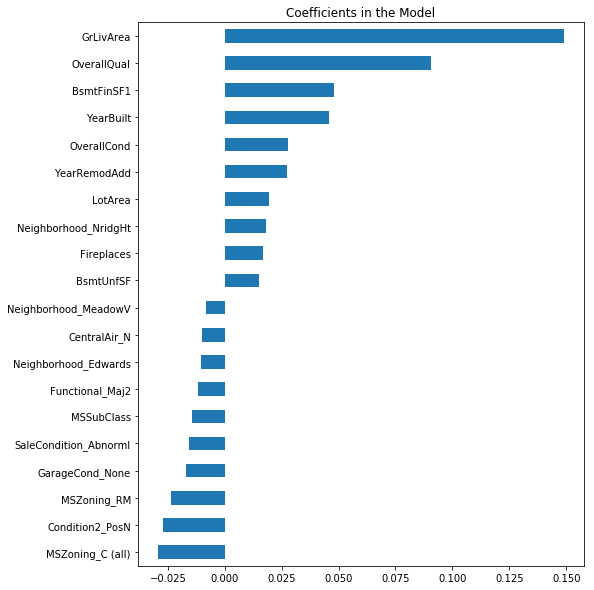

Ridge Regressor



picked 262 variables and eliminated the other 2 variables


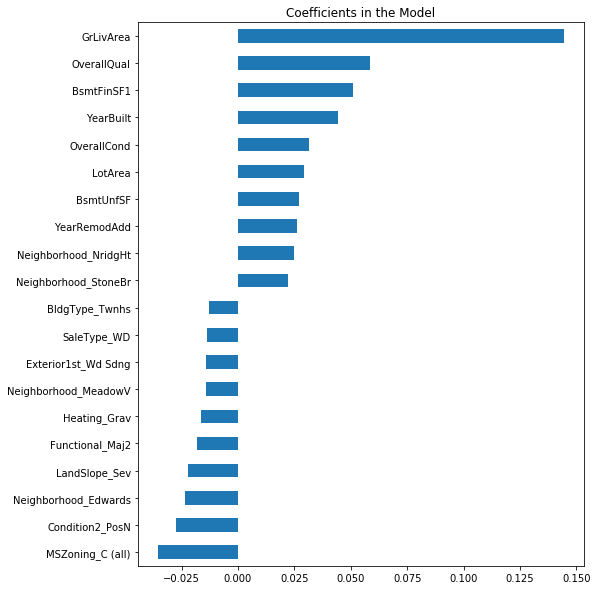

XGBoosting Regressor
[03:03:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



picked 264 variables and eliminated the other 0 variables


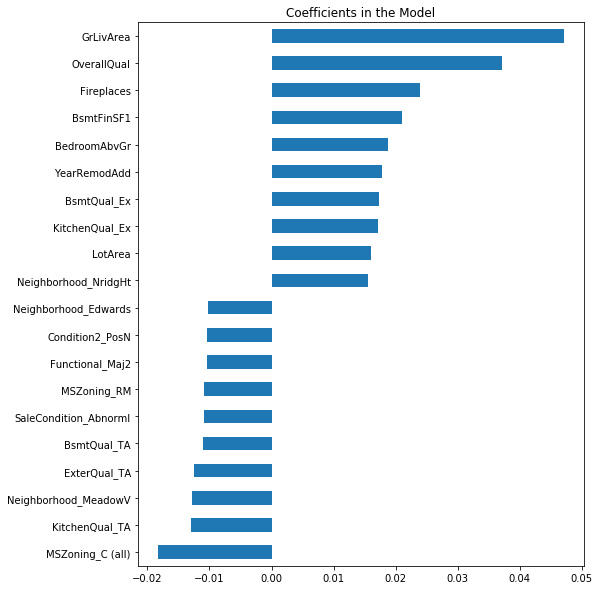

In [37]:
# Method to collect and print the different features the models picked.
def top_features(model):
    model.fit(X_train,Y_train)

    # Save off the coefficients of the model and print out the results.
    coef = pd.Series(model.coef_, index= combined_df.columns)
    print("\n\n")
    print("picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

    imp_coef = pd.concat([coef.sort_values().head(10), coef.sort_values().tail(10)])
    mp.rcParams['figure.figsize'] = (8.0, 10.0)
    imp_coef.plot(kind = "barh")
    
    plt.title("Coefficients in the Model")
    plt.show()


print("Lasso Regressor")
top_features(Lasso(alpha=0.005))

print("Ridge Regressor")
top_features(Ridge(alpha=10))

# No coefficients to show.#print("GradientBossting Regressor")
#top_features(GradientBoostingRegressor(learning_rate=0.05, n_estimators=300))

print("XGBoosting Regressor")
top_features(XGBRegressor(learning_rate=0.05, n_estimators=500, booster='gblinear'))

# No coefficients to show.
#print("RandomForest Regressor")
#top_features(RandomForestRegressor(n_estimators=100, max_depth=10))

### Test result with Ridge

In [0]:
# Incldue the import and the files download only if desired.
#from google.colab import files

# Set up the model and fit the data.
final_model = Ridge(alpha=grid_ls.best_estimator_.alpha)
final_model.fit(X_train_all, Y_train_all)

# Collect the predictions and apply the log transform to stay consistent with our target variable.
y_test = np.exp(final_model.predict(X_test))
pred_df = pd.DataFrame()

# Create a CSV to contain the values produced.
pred_df['Id'] = test_id
pred_df['SalePrice'] = y_test
#pred_df.to_csv('w207_team4_Ridge.csv', index=False)
#files.download('w207_team4_Ridge.csv')

### Test result with LASSO

In [0]:
# Set up the model and fit the data.
final_model = Lasso(alpha=grid_ls.best_estimator_.alpha)
final_model.fit(X_train_all, Y_train_all)

# Collect the predictions and apply the log transform to stay consistent with our target variable.
y_test = np.exp(final_model.predict(X_test))
pred_df = pd.DataFrame()

pred_df['Id'] = test_id
pred_df['SalePrice'] = y_test
#pred_df.to_csv('w207_team4_Lasso.csv', index=False)
#files.download('w207_team4_Lasso.csv')

### Apply PCA to the different features

As mentioned earlier, PCA is a highly effective way of reducing dimensions of the feature space and removing redundancy from the features, giving way to more accurate results.

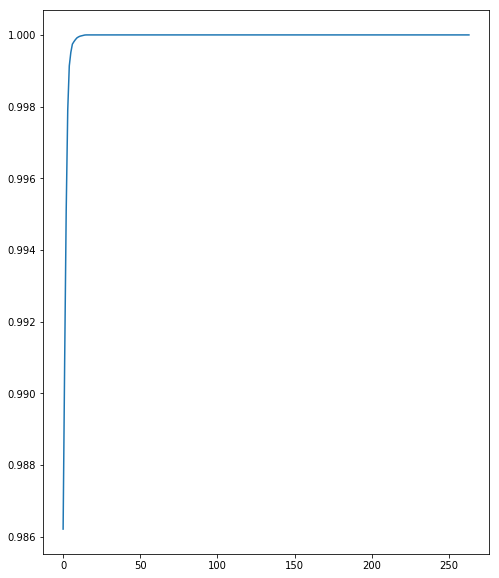

In [40]:
# Create PCA classifier and fit data. Make sure that for the categorical info that dummy data is used.
pca = PCA(whiten=True)
combined_df = pd.get_dummies(combined_df)
pca.fit(combined_df)

# Capture the variance and cumulative sum.
variance = pd.DataFrame(pca.explained_variance_ratio_)
csum_percent = np.cumsum(pca.explained_variance_ratio_)
plt.plot(csum_percent)

In [0]:
# Apply pca to the transformed data to use again with benchmarking.
pca = PCA(n_components=30,whiten=True)
pca = pca.fit(combined_df)
combined_df_PCA = pca.transform(combined_df)

In [0]:
# Split the test and train data again.
train = combined_df_PCA[:1460]
test = combined_df_PCA[1460:]

In [43]:
# Running all models with tuned parameters.
#benchmark(LinearRegression(), combined_df_PCA)
benchmark(Lasso(alpha=0.05), combined_df_PCA)
benchmark(Ridge(alpha=10), combined_df_PCA)
benchmark(GradientBoostingRegressor(learning_rate=0.05, n_estimators=300), combined_df_PCA)
benchmark(RandomForestRegressor(n_estimators=200, max_depth=10), combined_df_PCA)
benchmark(XGBRegressor(learning_rate=0.05, n_estimators=500), combined_df_PCA)

res_df = pd.DataFrame(data=res).T
res_df[['train_time','test_time','train_rmse','test_rmse']]

[03:03:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,train_time,test_time,train_rmse,test_rmse
Lasso,0.020398,0.003091,0.1761,0.2005
Ridge,0.018565,0.00261,0.0972,0.1898
GradientBoostingRegressor,2.22158,0.003003,0.0709,0.1329
XGBRegressor,4.20336,0.009651,0.0618,0.1295
RandomForestRegressor,3.4528,0.018367,0.0634,0.1554


## Result submission#


In [0]:
def make_submission(prediction, sub_name):
    my_submission = pd.DataFrame({'Id':test_orig.Id,'SalePrice':prediction})
    print(my_submission)
    
    my_submission.to_csv('{}.csv'.format(sub_name),index=False)
    print('A submission file has been made')

In [0]:
# Submission file to submit to the Kaggle contest.
#make_submission(predictions[:,0],'submission(NN).csv')


# Summarize the key findings. 





After the various runs that we had, it becomes clear that the Extreme Gradient Boosting algorithm is superior to the other algorithms in terms of taking the data and reducing the Root-Mean-Squared error value. 

Our findings from the beginning defined how we approached the data: 
 - We removed features from the feature space that had too many missing values since they would distort the predictions.
 - We transformed the numerical features through a scaler and encoded the categorical data to provide dummy values.
 - We applied a log transformation on the target variable and consistently tested against the transformed value with transformed predictions.
 - We utilized algorithms which specifically handled multicollinearity well and made sure that we reduced it as much as possible when possible.
 - We took advantage of the known variables and enhance our input data prior to testing to ensure that the most impactful data was being used.
 
With these steps, we were able to approach the modeling process with higher confidence than if we had just thrown the data into the training algorithm and hoped for the best. 

In general, we can see that our training data had better results (lower RMSE) for all of our tests. But there are some results from our testing which stand out. **Linear Regression** was among the best for running against our train data, in terms of lowest RMSE, but it was was terrible against the test data. Since there were no other incredibly unlikely scores as the values Linear Regression was showing for the test data, we can conclude that the cause of the result was not a bug in our data but in the internal calculation itself.

**Lasso** and **Ridge** both didn't improve their results as consistently as we would have wanted to see, which indicates that either we implemented the models incorrectly or that they weren't suited to handle our feature space as much as we had hoped. They still made predictions within reasonably low values for RMSE, but they weren't consistent nor were they the best compared to some of the other models.

The **Random Forest Regressor** had among the lowest RMSE values for the train data, but ended up not performing at the same level for the test data. Since the two data sets had been separated and recombined - but crucially always had the same transformations applied to them - we expect that there is something we didn't maintain across our testing that would have benefitted the Random Forest Regressor. One note that we may have made improvements over was including a stabilizing random seed for our testing, since that would have guaranteed consistently random selections for our models. Howevever, the difference in RMSE between train and test can't be fully explained away by that inclusion.

Both **Gradient Boosting** and **XGBoosting** performed well with our test data - they consistently had the lowest RMSE out of our models for the test data while executing at competitive speeds. Gradient Boosting effectively regresses the residual of the first output into recursive linear regression models. This improves the result steadily over the multiple iterations, thus resulting in a lower RMSE than plain linear regression. This approach is further refined by XGBoosting, which takes the parameters for Gradient Boosting and implements the whole algorithm in a more rigorous approach. This is why its RMSE scores were comparable but in the end better than just Gradient Boosting.
 
At the onset, we weren't sure which model would best represent our predictions by reducing variance and the root-mean-squared error. The approach we sought to take was to test out multiple models and compare them. After that comparison, we tried various post-modeling procecssing to the data, such as tuning the hyperparameters with iterative testing and mutliple parameterization via Grid Search, and applying dimensionality reduction on categorical data with PCA. The results in the in improved, but not substantially, informing us that we have achieved ostensibly the most we can go with our process. While there admittedly might be lower scores from others, our approach was meant to be a comprehensive look at the data and an application of our understanding with how machine learning algorithms can be used with a variety of features to make predictions of a target variable.

As for the important features, the top features that have positive weights in predicting sale price are Living area footage, overall quality, finshed basement Squarefoot, Bedrooms, year remodeled, lot area, and neighborhood-Nridgeht. The top features that are negatively weighted to predict sale price are  Commercial Zoning
Major Functional Deductions, Close Proximity to main road or railroad and neighborhood-Meadow and Edwards. 

